# 단순선형회귀

단순 선형 회귀 분석으로 농어의 길이를 가지고 무게를 예측하는 모델을 만들어 보자

## #01. 준비작업

### [1] 패키지 참조

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from pandas import read_excel
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

### [2] 그래프 초기화

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

### [3] 데이터 가져오기

In [4]:
origin = read_excel('C:/Users/J/Desktop/Data_Science/Class/E.추론통계/E.InferentialStatistics/수업자료/fish.xlsx')
origin

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0
5,18.0,5.22,3.32,100.0
6,18.7,5.20,3.12,78.0
7,19.0,5.64,3.05,80.0
8,19.6,5.14,3.04,85.0
9,20.0,5.08,2.77,85.0


## #02. 데이터 전처리

### [1] 필요한 변수만 추출

In [5]:
df = origin[['길이', '무게']]
df.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


### [2] 데이터 분포 확인

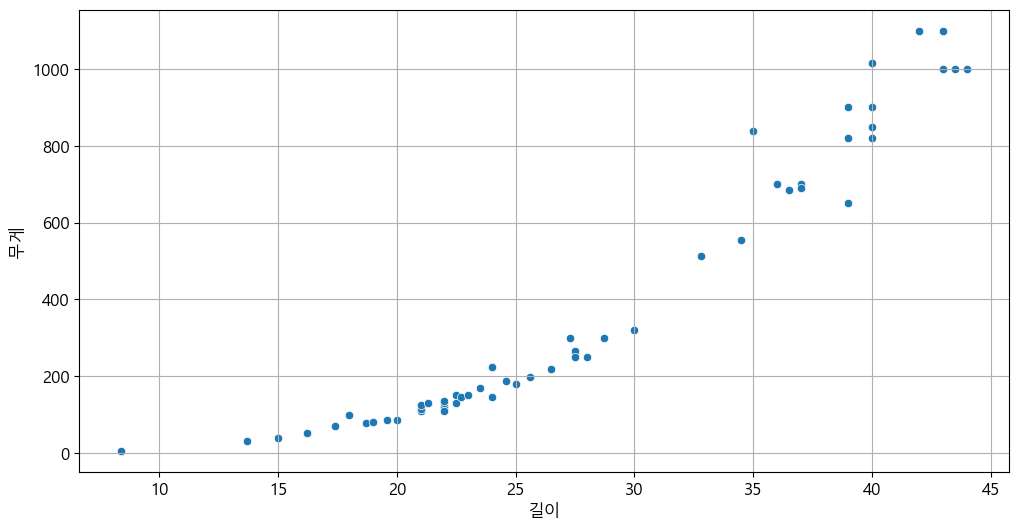

In [6]:
plt.figure()
sb.scatterplot(data=df, x='길이', y = '무게')
plt.grid()
plt.show()
plt.close()

### [3] 훈련데이터와 검증데이터 분할

- train data / 훈련데이터 : 모델을 생성하는데 사용되는 데이터
- test data / 검증데이터 : 모델이 얼마나 잘 만들어졌는지 확인하는 용도

#### (1) 독립변수 분리

> 수업 내에서 규칙 : 독립변수만 모아 놓은 데이터 프레임 형태로 사용

In [7]:
x = df[['길이']]
x.head()

,길이
0,8.4
1,13.7
2,15.0
3,16.2
4,17.4


#### (2) 종속변수 분리

> 수업 내에서의 규칙 : numpy array 혹은 시리즈 객체로 사용

In [8]:
y = df['무게']
y.head()

0     5.9
1    32.0
2    40.0
3    51.5
4    70.0
Name: 무게, dtype: float64

#### (3) 데이터 분할

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1000)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 1), (17, 1), (39,), (17,))

## #03. 데이터 분석

### [1] 선형회귀 모델 구축

In [10]:
model = LinearRegression()

fit = model.fit(x_train, y_train)

print('계수(기울기): ', fit.coef_)
print('절편:', fit.intercept_)
print('훈련 데이터 설명력: ', fit.score(x_train, y_train))
print('검증 데이터 설명력: ', fit.score(x_test, y_test))

'y = {0:0.2f} * X + {1: 0.2f}'.format(fit.coef_[0], fit.intercept_)

계수(기울기):  [36.70487678]
절편: -636.500563266025
훈련 데이터 설명력:  0.9161273697509321
검증 데이터 설명력:  0.9087299737608155


'y = 36.70 * X + -636.50'

### [2] 분석 결과 확인

#### (1) 훈련 데이터에 대한 예측값 얻기

`y_train`과 얼마나 차이가 나는가 확인이 필요하다.

In [11]:
y1 = fit.predict(x_train)
y1

array([ 941.80913807,    2.16429262,  372.88354805,  960.16157646,
        831.69450774,  567.41939496,  648.17012387,  134.30184901,
        134.30184901,   24.18721869,  171.00672579,  134.30184901,
        336.17867128,  196.70013953,  416.92940018,  171.00672579,
        145.31331205,  794.98963097,  721.57987742,  629.81768548,
        244.41647934,  978.51401484,  189.35916418,  794.98963097,
        464.64573999,  281.12135611,  831.69450774,  684.87500064,
        703.22743903,  794.98963097,  244.41647934,  941.80913807,
       -133.64375145,  303.14428218,  365.5425727 , -328.17959835,
         60.89209546,  226.06404095,  905.10426129])

#### (2) 검증 데이터에 대한 예측값 얻기

`y_test`와 얼마나 차이가 나는가 확인이 필요하다.

In [12]:
y2 = fit.predict(x_test)
y2

array([372.88354805, 266.4394054 ,  97.59697224, 171.00672579,
        82.91502153, 721.57987742,  49.88063243, -41.88155951,
       372.88354805, -85.92741164, 391.23598644, 831.69450774,
       207.71160256, 831.69450774, 171.00672579, 189.35916418,
       171.00672579])

### [3] 분석 결과 시각화

> 91%라는 설명력에 비해 추세선으로부터 실제 데이터들이 너무 멀리 떨어져 있다.(=잔차가 크다)

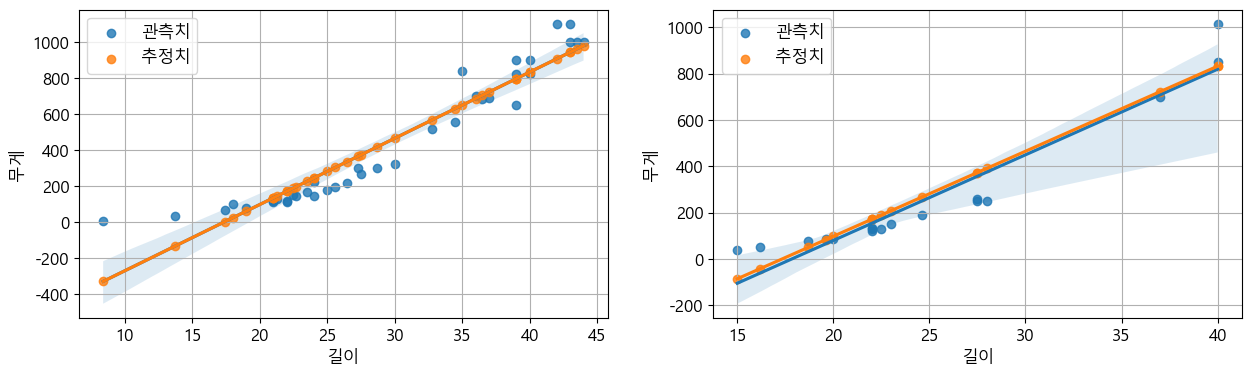

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,4))

sb.regplot(x = x_train['길이'], y = y_train, ax = ax1, label='관측치')
sb.regplot(x = x_train['길이'], y = y1, ax = ax1, label='추정치')

sb.regplot(x = x_test['길이'], y = y_test, ax = ax2, label='관측치')
sb.regplot(x = x_test['길이'], y = y2, ax = ax2, label='추정치')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.show()
plt.close()


In [15]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     무게   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     404.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.66e-21
Time:                        15:33:15   Log-Likelihood:                -236.08
No. Observations:                  39   AIC:                             476.2
Df Residuals:                      37   BIC:                             479.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -636.5006     55.830    -11.401      0.000    -749.623    -523.379
길이            36.7049      1.826     20.103      0.000      33.005      40.404
==============================================================================
Omnibus:                       11.160   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.599
Skew:                           1.112   Prob(JB):                      0.00499
Kurtosis:                       4.257   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## #04. 과적합의 이해

실제 데이터와 머신러닝의 추정치가 일치하지 않는 현상

### [1] 과소적합

분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우

![res/1.png](res/1.png)

모델이 단순하다는 의미는 변수(피처)의 수가 부족함을 의미함

#### 해결방법

- 모델 파라미터가 더 많은 모델을 선택 (단순선형회귀 -> 다항회귀)
- 학습 알고리즘에 더 좋은 특성을 제공(하이퍼파라미터 튜닝)

> 결국은 변수를 늘리라는 뜻

### [2] 과대적합

훈련 데이터에 있는 잠음의 양이 모델에 비해 너무 복잡한 경우

설명력에 비해 잔차가 큰 경우라 할 수 있다.

![res/2.png](res/2.png)

#### 해결방법

- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 특성 수를 줄임 (차원축소)
- 모델을 단순화 시킴
- 훈련 데이터의 잡음을 줄임 (이상치 제거)

> 결국은 변수를 줄이라는 뜻